Solving the heat equation

$$
\frac{\partial u}{\partial t}=k \frac{\partial^{2} u}{\partial x^{2}}, \quad 0<x<L, t>0
$$
with the boundary conditions $u(0, t)=f(t)$ and $u(L, t)=g(t)$ and initial condition $u(x, 0)=h(x)$.

Discretizing the derivatives we get

$$\frac{\partial u}{\partial t}=\frac{u_{j}^{i+1}-u_{j}^{i}}{\Delta t}$$
and a discrete centered space derivative is
$$
\frac{\partial^{2} u}{\partial x^{2}}=\frac{u_{j+1}^{i}-2 u_{j}^{i}+u_{j-1}^{i}}{\Delta x^{2}}
$$

Substituting in the heat equation we get the noumerical sheme
$$
u_{j}^{i+1}=u_{j}^{i}+\frac{k \Delta t}{(\Delta x)^{2}}\left(u_{j+1}^{i}-2 u_{j}^{i}+u_{j-1}^{i}\right)
$$

In matrix notation, this becomes
$$
\left(\begin{array}{c}
u_{1}^{i+1} \\
u_{2}^{i+1} \\
\vdots \\
u_{N-1}^{i+1} \\
u_{N}^{i+1}
\end{array}\right)=\left(\begin{array}{ccccc}
1-2 r & r & & & \\
r & 1-2 r & r & & \\
& \ddots & \ddots & \ddots & \\
& & r & 1-2 r & r \\
& & & r & 1-2 r
\end{array}\right)\left(\begin{array}{c}
u_{1}^{i} \\
u_{2}^{i} \\
\vdots \\
u_{N-1}^{i} \\
u_{N}^{i}
\end{array}\right), \quad r=\frac{k \Delta t}{\Delta x^{2}},
$$
where at each time step $i$ we impose the boundary conditions $u_{1}^{i}=f(i \Delta t)$ and $u_{N}^{i}=g(i \Delta t)$.


In [1]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

0.34656000000000003 <? 0.5


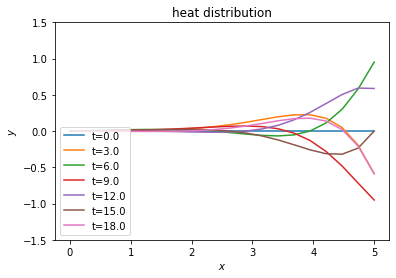

In [2]:
x = np.linspace(0,5,20)
dt = 0.06
tMax = 20
k = 0.4 #thermal conductivity constant
t = np.arange(0,tMax,dt)

def fLeft(t):
    return 0*t
def fRight(t):
    return np.sin(2*np.pi*t/5)
def fInitial(x):
    return 0*x

dx = x[1]-x[0]
r = k*dt/dx**2
print(r,"<?", 1/2)
n = len(x)
#Create diagonal matrix
aMat = spdiags([r*np.ones(n),(1-2*r)*np.ones(n),r*np.ones(n)],[-1,0,1],n,n)

#Impose inital conditions
u = np.zeros((len(t),n))
u[0,:] = fInitial(x)
u[:,0] = fLeft(t)
u[:,-1] = fRight(t)

for i in range(0,len(t)-1):
    
    u[i+1,:] = np.dot(aMat.toarray(), u[i,:])
    u[i+1,0] = fLeft(t[i])
    u[i+1,-1] = fRight(t[i])
    
for i in np.arange(0,len(t), 50):
    
    #plot
    plt.plot(x,u[i+1,:], label=f"t={t[i]}") 
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title("heat distribution")
    plt.ylim(-1.5,1.5)
    plt.legend(loc='lower left')

plt.show()

#### Convert it to a class

In [3]:
class HeatConduction:
    def __init__(self,k,xl,xr,fLeft, fRight, fInitial,
                  nX=20,dt=0.06,tMax=20):
        self.xl = xl
        self.xr = xr
        self.nX = nX
        self.dt = dt
        self.tMax = tMax
        self.k = k #thermal conductivity constant
        
        #Initial and boundary conditions (Functions)
        self.fLeft = fLeft
        self.fRight = fRight
        self.fInitial = fInitial
        
    def get_timespace_grid(self):
        return [np.linspace(self.xl,self.xr,self.nX),
                np.arange(0,self.tMax,self.dt)]
    
    def check_stabilty(self):
        dx = (self.xl - self.xr)/self.nX
        r = k*self.dt/dx**2
        print(r,"<?", 1/2)
        return(r)
        
    def create_mat_iter(self):
        r = self.check_stabilty() 
        return spdiags([r*np.ones(self.nX),(1-2*r)*np.ones(self.nX),r*np.ones(self.nX)],[-1,0,1],self.nX,self.nX)
    
    def init_u(self):
        #Impose inital conditions
        x, t = self.get_timespace_grid()
        u = np.zeros((len(t),self.nX))
        u[0,:] = self.fInitial(x)
        u[:,0] = self.fLeft(t)
        u[:,-1] = self.fRight(t)
        return u
        
    
    def integrator(self):
        x, t = self.get_timespace_grid()
        u = self.init_u()
        aMat = self.create_mat_iter()
        for i in range(0,len(t)-1):
            u[i+1,:] = np.dot(aMat.toarray(), u[i,:])
            u[i+1,0] = self.fLeft(t[i])
            u[i+1,-1] = self.fRight(t[i])
        return [u, x, t]
    
    def plot_distr(self,pts_sel):
        u,x,t = self.integrator()
        for i in pts_sel:
            plt.plot(x,u[i+1,:], label=f"t={t[i]}") 
            plt.xlabel("$x$")
            plt.ylabel("$y$")
            plt.title("heat distribution")
            plt.ylim(-1.5,1.5)
            plt.legend(loc='lower left')

        plt.show()

0.384 <? 0.5


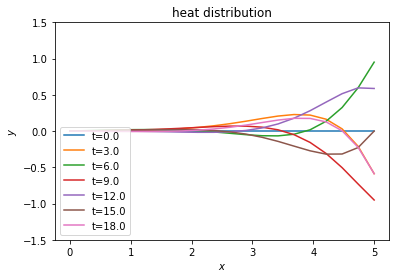

In [4]:
def fLeft(t):
    return 0*t
def fRight(t):
    return np.sin(2*np.pi*t/5)
def fInitial(x):
    return 0*x

heat = HeatConduction(0.4,0,5,fLeft,fRight,fInitial)
pts_sel = np.arange(0,len(t), 50)
heat.plot_distr(pts_sel)

0.384 <? 0.5


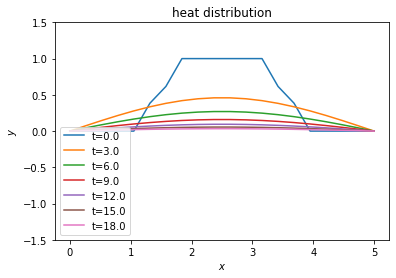

In [5]:
def fLeft(t):
    return 0*t
def fRight(t):
    return 0*t
def fInitial(x):
    val = np.zeros(len(x))
    val[(x >= 2.5 - 1) & (x <= 2.5 + 1)] = 1
    return val

heat = HeatConduction(0.4,0,5,fLeft,fRight,fInitial)
pts_sel = np.arange(0,len(t), 50)
heat.plot_distr(pts_sel)